In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from intersect import intersection

In [2]:
def trend_line(x, y, degree=1):
  coeffs = np.polyfit(x, y, degree)
  poly = np.poly1d(coeffs)
  y_trend = poly(x)
  return coeffs, y_trend

In [3]:
frame = pd.read_csv("../data/optyka_306/dane.csv", delimiter=",")

In [4]:
c = frame['c'].to_list()
d = frame['deg'].to_list()
coeffs, y_trend = trend_line(c, d)

intersect = intersection(c, y_trend, np.linspace(c[0], c[-1], len(c)), np.linspace(75.48, 75.48, len(c)))

print(f"x1: {intersect[0][0]} y1: {intersect[1][0]}")

x1: 8.011134802179546 y1: 75.48


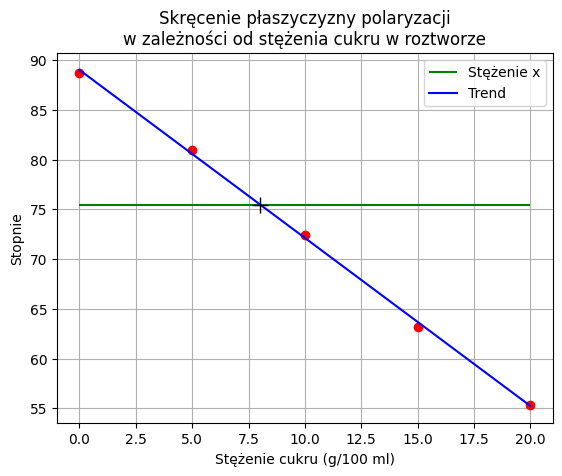

In [5]:
plt.plot(c, d, 'ro')
plt.hlines(y=75.48, xmin=0, xmax=20, colors="g", linestyles="-", label="Stężenie x")
plt.plot(c, y_trend, 'b-', label='Trend')
plt.plot(intersect[0][0], intersect[1][0], 'k+', markersize=12)
plt.xlabel("Stężenie cukru (g/100 ml)")
plt.ylabel("Stopnie")
plt.title("Skręcenie płaszyczyzny polaryzacji\nw zależności od stężenia cukru w roztworze")
plt.legend()
plt.grid()
plt.show()